In [18]:
import pandas as pd, numpy as np
from datetime import datetime
import statsmodels.api as sm
import yfinance as yf
import time, urllib
import glob
import os

import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

# 导入自己的模块
from data_download_US_HK import *
from strategies import *
from positions import *

# 模块一：下载数据到csv文件

In [19]:
futures = ['NQ=F','ES=F','YM=F','GC=F','CL=F','XAU=F','RB=F','CT=F','ALI=F']
# https://finance.yahoo.com/commodities/

In [20]:
print(futures)

['NQ=F', 'ES=F', 'YM=F', 'GC=F', 'CL=F', 'XAU=F', 'RB=F', 'CT=F', 'ALI=F']


In [21]:
us_tickers_to_load = list(set(US_TICKERS_POOL.us_tech_stocks() + \
			              US_TICKERS_POOL.us_blockchain_stocks() + \
			              US_TICKERS_POOL.us_saas_stocks() + \
			              US_TICKERS_POOL.us_biotech_stocks() + \
			              US_TICKERS_POOL.us_new_energy_stocks() + \
			              US_TICKERS_POOL.global_etfs() + \
			              US_TICKERS_POOL.sector_etf() + \
			              US_TICKERS_POOL.global_indices() +\
			              US_TICKERS_POOL.us_healthcare_stocks() +\
			              US_TICKERS_POOL.us_fin_stocks() +\
			              US_TICKERS_POOL.us_utilities_stocks() +\
			              US_TICKERS_POOL.us_materials_stocks() +\
			              US_TICKERS_POOL.other_us_stocks() +\
                            US_TICKERS_POOL.us_consumer_discretionary_stocks() +\
                            US_TICKERS_POOL.us_consumer_staples_stocks() +\
                            US_TICKERS_POOL.us_industrial_stocks() +\
                            US_TICKERS_POOL.us_real_estate_stocks() +\
                            US_TICKERS_POOL.us_tele_entertainment_stocks()))

# global_etfs_leveraged = list(set(["TQQQ",#纳指100x3
# 					"UPRO",#标普x3                        
# 					"UDOW",#道指x3
                        

# 					"USD", # 半导体行业x2
# 					"SOXL", # 半导体行业x3
# 					"UYG",# 金融双倍做多
# 					"URE",# 房地产双倍做多
# 					"DRN",#x3
# 					"DIG",# 能源双倍做多
# 					"ERX",#x3
# 					"UYM",# 原材料双倍做多 
# 					"MATL",#x3
# 					"NUGT",#黄金矿业三倍做多
# 					"EET",# 新兴市场指数双倍做多
# 					"EDC",#x3
# 					"XPP",# 中国股票指数x2
# 					"UCO",# 石油x2
# 					"DGP",# 黄金x2
# 					"UGL",# 黄金x2
# 					"AGQ",# 白银x2
# 					"EUO",# 美元x2
# 					"UBT",# 政府长期债券x2
# 					"TMF"# x3
# 					]))

hk_tickers_to_load = HK_TICERS_POOL.HK_tickers()

CN_mutual_funds = CN_TICKERS_POOL.CN_fund_tickers()

all_tickers_to_load = all_tickers()

start = "2005-01-01"
today = LOAD_DATA.today_dt()
end = today

# 如果用这个yesterday，则代表着只需要到昨天的数据
# end_yesterday = "2021-03-02"

us_db_path = "C:/Users/Administrator/CE_github_2/data_pipeline/Data/"

All Tickers: 355


In [22]:
main_etf = ['SOXL','TNA','YINN','PBW','TQQQ',
            'UPRO','FAS','UDOW','PAVE','ARKG',
           'ARKK','SCO','NUGT','UCO','UVXY','EUO']

In [23]:
all_tickers_to_load =  list(set(us_tickers_to_load+futures+hk_tickers_to_load+main_etf))

In [24]:
len(all_tickers_to_load)

364

In [25]:
# 美股：国债期货指数 & 大盘
# 国内：国债期货指数 & 大盘

In [26]:
# download data to csv files
# LOAD_DATA.easy_download(start, end, us_db_path, all_tickers_to_load[53:242])
LOAD_DATA.easy_download(start, end, us_db_path,all_tickers_to_load)
# LOAD_DATA.easy_download(start, end, us_db_path,all_tickers_to_load+['BTC-USD'])
# LOAD_DATA.easy_download(start, end, us_db_path,['FORD'])
# LOAD_DATA.easy_download(start, end, us_db_path, ["^HSI"])

[*********************100%***********************]  1 of 1 completed
No.1: BIDU data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.2: MET data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.3: 0596.HK data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.4: VXX data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.5: INO data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.6: ADP data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.7: XLI data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.8: 0732.HK data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.9: NKE data file created: 2021-06-03
[*********

[*********************100%***********************]  1 of 1 completed
No.75: RACE data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.76: INTU data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.77: 2309.HK data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.78: ^HSI data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.79: 1458.HK data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.80: URE data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.81: CDAY data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.82: NUGT data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.83: 2382.HK data file created: 2021

[*********************100%***********************]  1 of 1 completed
No.149: UYG data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.150: TEAM data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.151: 6088.HK data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.152: ADSK data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.153: XLV data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.154: VIR data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.155: ^DJI data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.156: 6055.HK data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.157: 1810.HK data file create

[*********************100%***********************]  1 of 1 completed
No.222: XLB data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.223: 1310.HK data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.224: SHOP data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.225: NEE data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.226: AMGN data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.227: LAC data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.228: TQQQ data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.229: GE data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.230: XEL data file created: 2021-0

[*********************100%***********************]  1 of 1 completed
No.295: SRE data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.296: FXY data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.297: ES data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.298: PSA data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.299: 0493.HK data file created: 2021-06-03
=======================Sleeping======================
[*********************100%***********************]  1 of 1 completed
No.301: CRWD data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.302: ORCL data file created: 2021-06-03
[*********************100%***********************]  1 of 1 completed
No.303: USD data file created: 2021-06-03
[*********************100%***********************]  1

In [17]:
605.12/900.4-1

-0.32794313638382944

In [9]:
# Download data from Sina:
LOAD_DATA.download_data_from_Sina(CN_mutual_funds+['001679','511010'], start, end, us_db_path)

All Data Downloaded


In [19]:
data_list_selected = LOAD_DATA.read_data_from_folders(us_tickers_to_load, us_db_path)

Loadig Data from DB: No.1 / 267: DDOG
Loadig Data from DB: No.2 / 267: MDT
Loadig Data from DB: No.3 / 267: T
Loadig Data from DB: No.4 / 267: INO
Loadig Data from DB: No.5 / 267: TSM
Loadig Data from DB: No.6 / 267: ENPH
Loadig Data from DB: No.7 / 267: ABBV
Loadig Data from DB: No.8 / 267: NQ=F
Loadig Data from DB: No.9 / 267: WFC
Loadig Data from DB: No.10 / 267: RSX
Loadig Data from DB: No.11 / 267: UGL
Loadig Data from DB: No.12 / 267: XLP
Loadig Data from DB: No.13 / 267: INDA
Loadig Data from DB: No.14 / 267: MMM
Loadig Data from DB: No.15 / 267: XLE
Loadig Data from DB: No.16 / 267: PAYC
Loadig Data from DB: No.17 / 267: DBC
Loadig Data from DB: No.18 / 267: GS
Loadig Data from DB: No.19 / 267: TSN
Loadig Data from DB: No.20 / 267: VEEV
Loadig Data from DB: No.21 / 267: ARKG
Loadig Data from DB: No.22 / 267: SBUX
Loadig Data from DB: No.23 / 267: LAC
Loadig Data from DB: No.24 / 267: CZR
Loadig Data from DB: No.25 / 267: KHC
Loadig Data from DB: No.26 / 267: CB
Loadig Data from

Loadig Data from DB: No.222 / 267: FXF
Loadig Data from DB: No.223 / 267: ERX
Loadig Data from DB: No.224 / 267: CSCO
Loadig Data from DB: No.225 / 267: ARKF
Loadig Data from DB: No.226 / 267: CL
Loadig Data from DB: No.227 / 267: PG
Loadig Data from DB: No.228 / 267: BAC
Loadig Data from DB: No.229 / 267: EXC
Loadig Data from DB: No.230 / 267: GE
Loadig Data from DB: No.231 / 267: SMAR
Loadig Data from DB: No.232 / 267: ^HSI
Loadig Data from DB: No.233 / 267: DD
Loadig Data from DB: No.234 / 267: IEF
Loadig Data from DB: No.235 / 267: XLV
Loadig Data from DB: No.236 / 267: AXP
Loadig Data from DB: No.237 / 267: SHW
Loadig Data from DB: No.238 / 267: NEM
Loadig Data from DB: No.239 / 267: ZEN
Loadig Data from DB: No.240 / 267: XPEV
Loadig Data from DB: No.241 / 267: EDC
Loadig Data from DB: No.242 / 267: UBTTMF
Loadig Data from DB: No.243 / 267: AMZN
Loadig Data from DB: No.244 / 267: FXI
Loadig Data from DB: No.245 / 267: AEP
Loadig Data from DB: No.246 / 267: NOW
Loadig Data from DB:

In [20]:
# Generate signals
daily_macd_updown_signals = GENERATE_SIGNALS.generate_signals_macd_updown_ma_slope( 
                                                                           data_list_selected,
#                                                                            CN_fund_data,
                                                                          "Macd_Updown_MA_Slope_Signals", 
                                                                          "Date", 
                                                                          "Adj Close", 
                                                                          "Ticker", 
                                                                          "D")

Signals(D) Prepared for No.1 : DDOG
Signals(D) Prepared for No.2 : MDT
Signals(D) Prepared for No.3 : T
Signals(D) Prepared for No.4 : INO
Signals(D) Prepared for No.5 : TSM
Signals(D) Prepared for No.6 : ENPH
Signals(D) Prepared for No.7 : ABBV
Signals(D) Prepared for No.8 : NQ=F
Signals(D) Prepared for No.9 : WFC
Signals(D) Prepared for No.10 : RSX
Signals(D) Prepared for No.11 : UGL
Signals(D) Prepared for No.12 : XLP
Signals(D) Prepared for No.13 : INDA
Signals(D) Prepared for No.14 : MMM
Signals(D) Prepared for No.15 : XLE
Signals(D) Prepared for No.16 : PAYC
Signals(D) Prepared for No.17 : DBC
Signals(D) Prepared for No.18 : GS
Signals(D) Prepared for No.19 : TSN
Signals(D) Prepared for No.20 : VEEV
Signals(D) Prepared for No.21 : ARKG
Signals(D) Prepared for No.22 : SBUX
Signals(D) Prepared for No.23 : LAC
Signals(D) Prepared for No.24 : CZR
Signals(D) Prepared for No.25 : KHC
Signals(D) Prepared for No.26 : CB
Signals(D) Prepared for No.27 : NUGT
Signals(D) Prepared for No.28 :

Signals(D) Prepared for No.224 : CSCO
Signals(D) Prepared for No.225 : ARKF
Signals(D) Prepared for No.226 : CL
Signals(D) Prepared for No.227 : PG
Signals(D) Prepared for No.228 : BAC
Signals(D) Prepared for No.229 : EXC
Signals(D) Prepared for No.230 : GE
Signals(D) Prepared for No.231 : SMAR
Signals(D) Prepared for No.232 : ^HSI
Signals(D) Prepared for No.233 : DD
Signals(D) Prepared for No.234 : IEF
Signals(D) Prepared for No.235 : XLV
Signals(D) Prepared for No.236 : AXP
Signals(D) Prepared for No.237 : SHW
Signals(D) Prepared for No.238 : NEM
Signals(D) Prepared for No.239 : ZEN
Signals(D) Prepared for No.240 : XPEV
Signals(D) Prepared for No.241 : EDC
index -1 is out of bounds for axis 0 with size 0
Signals(D) Prepared for No.243 : AMZN
Signals(D) Prepared for No.244 : FXI
Signals(D) Prepared for No.245 : AEP
Signals(D) Prepared for No.246 : NOW
Signals(D) Prepared for No.247 : CYB
Signals(D) Prepared for No.248 : BX
Signals(D) Prepared for No.249 : EBAY
Signals(D) Prepared for 

In [21]:
daily_macd_updown_signals_to_present = daily_macd_updown_signals[daily_macd_updown_signals['Signal']=="买入"]
daily_macd_updown_signals_to_present["满足的趋势形态"] = "前一日MACD值开始向上反转，并且价格收盘于5日均线之上，并且10日均线处于上升状态"
daily_macd_updown_signals_to_present.columns = ['股票代号','最新收盘日','信号','模型名称','模型频率','满足的趋势形态']

<ipython-input-21-2094c7f15a0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_macd_updown_signals_to_present["满足的趋势形态"] = "前一日MACD值开始向上反转，并且价格收盘于5日均线之上，并且10日均线处于上升状态"


In [18]:
daily_macd_updown_signals_to_present[['股票代号','最新收盘日','满足的趋势形态']]

NameError: name 'daily_macd_updown_signals_to_present' is not defined

In [19]:
1+1

2

In [21]:
daily_macd_updown_signals[daily_macd_updown_signals["Ticker"]=="TQQQ"]

,Ticker,Last_Date,Signal,model_name,model_freq
179,TQQQ,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D


In [13]:
signal_path = "C:/Users/Administrator/CE_github_2/data_pipeline/Signals/"

###################################
signal_file = signal_path+end+"_signals"+"_D_US_mkt"+".csv"
###################################

# merged_daily_weekly.to_csv(signal_file)
daily_macd_updown_signals.to_csv(signal_file)

In [14]:
signal = pd.read_csv(signal_file)
perf = pd.read_csv("C:/Users/Administrator/CE_github_2/data_pipeline/Performance/US_performance_MACD_UPDOWN_MA_SLOPE_W_COMM_all.csv")
# support and resistance:
# sar_signal = pd.read_csv("C:/Users/Administrator/CE_github_2/data_pipeline/Signals/2021-03-24_SAR_signals_D_US_mkt.csv")

In [15]:
merged = perf.merge(signal, on = "Ticker")
# merged.dropna(inplace = True)
# merged = merged.merge(sar_signal, on = "Ticker")

In [16]:
merged_buy = merged[merged['Signal']=='买入']

In [17]:
merged_buy

,Ticker,total_commission,gross_profit,net_profit,commission_impact,win %,PL Ratio,overall_score,strat_name,commission,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 0,Last_Date,Signal,model_name,model_freq
50,QCOM,264,4208.12,3944.12,6.27%,48.48,1.83,0.37,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,105,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
58,EBAY,236,2331.38,2095.38,10.12%,38.98,2.37,0.32,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,142,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
59,XLV,252,1650.71,1398.71,15.27%,52.38,1.52,0.32,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,195,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
62,XLK,260,2424.60,2164.60,10.72%,60.00,1.17,0.30,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,45,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
63,QQQ,268,2309.66,2041.66,11.60%,56.72,1.29,0.30,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,201,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
70,SPY,264,1547.22,1283.22,17.06%,56.06,1.27,0.27,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,38,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
75,LULU,280,2255.50,1975.50,12.41%,37.14,2.34,0.24,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,242,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
77,DHR,292,1554.06,1262.06,18.79%,41.10,2.02,0.24,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,185,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
85,^GSPC,264,1070.81,806.81,24.65%,53.03,1.29,0.21,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,130,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
92,MSFT,312,1961.16,1649.16,15.91%,47.44,1.52,0.19,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,60,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D


In [18]:
merged_buy_os = merged_buy[merged_buy['overall_score']>0]

In [20]:
merged_buy_os

,Ticker,total_commission,gross_profit,net_profit,commission_impact,win %,PL Ratio,overall_score,strat_name,commission,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 0,Last_Date,Signal,model_name,model_freq
50,QCOM,264,4208.12,3944.12,6.27%,48.48,1.83,0.37,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,105,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
58,EBAY,236,2331.38,2095.38,10.12%,38.98,2.37,0.32,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,142,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
59,XLV,252,1650.71,1398.71,15.27%,52.38,1.52,0.32,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,195,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
62,XLK,260,2424.60,2164.60,10.72%,60.00,1.17,0.30,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,45,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
63,QQQ,268,2309.66,2041.66,11.60%,56.72,1.29,0.30,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,201,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
70,SPY,264,1547.22,1283.22,17.06%,56.06,1.27,0.27,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,38,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
75,LULU,280,2255.50,1975.50,12.41%,37.14,2.34,0.24,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,242,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
77,DHR,292,1554.06,1262.06,18.79%,41.10,2.02,0.24,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,185,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
85,^GSPC,264,1070.81,806.81,24.65%,53.03,1.29,0.21,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,130,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
92,MSFT,312,1961.16,1649.16,15.91%,47.44,1.52,0.19,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,60,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D


In [78]:
merged_buy_os_to_present = merged_buy_os[['Ticker','Last_Date','Signal_Info','Nearest_Level',"overall_score"]]

In [80]:
merged_buy_os_to_present.columns = ['股票代号','最新收盘日','满足点位形态','最近点位','回测分数']

In [83]:
merged_buy_os_to_present[['股票代号','最新收盘日','满足点位形态']].drop_duplicates()

,股票代号,最新收盘日,满足点位形态
13,CMG,2021-03-23,形成支撑点:1442.94
31,GOOGL,2021-03-23,形成支撑点:2002.93
35,GOOG,2021-03-23,形成支撑点:2017.68


In [47]:
# current portfolio & calculate correlations inside the portfolio

current_portfolio_tickers = [# 跌穿120日均线则止损
                            "TQQQ",
                             "XLF",
                             "XLI"
                            ]

In [48]:
new_portfolio_tickers = ["UDOW","EUO"]

In [50]:
all_pportfolio_tickers = current_portfolio_tickers+new_portfolio_tickers
all_pportfolio_tickers

['TQQQ', 'XLF', 'XLI', 'UDOW', 'EUO']

In [6]:
def stock_list_to_calculate_corr(all_csvs, date_col, price_col, ticker_col):
	len_ = 0
	for fname in glob.glob(all_csvs)[:]:
		try:
			stock = pd.read_csv(fname)
			stock = stock.sort_values(date_col)
			ticker = str(stock[ticker_col].values[-1])
			print(ticker)
			stock = stock[[date_col,price_col]]
			stock['pct_chg'] = stock[price_col].pct_change()
			stock.columns = [date_col, price_col, ticker]
			stock = stock[[date_col, ticker]].dropna()
			stock[date_col] = pd.to_datetime(stock[date_col])
			#     stock.set_index('date', inplace=True)
			stock_list.append(stock)
			print ("Length of {}: {}".format(ticker, len(stock)))
			len_ = len_+len(stock)
			print ("Total length:{}".format(len_))
			print ("===========")
		except Exception as e:
			print("Error on: {}, {}".format(fname, e))
	return stock_list

In [7]:
all_csvs = "C:/Users/Administrator/CE_github_2/data_pipeline/Data/*.csv"
date_col = "Date"
price_col = "Adj Close"
ticker_col = "Ticker"
stock_list = []
stock_list = stock_list_to_calculate_corr(all_csvs, date_col, price_col, ticker_col)
merged_all = reduce(merge_df, stock_list)
merged_all.set_index(date_col, inplace=True)

000001.SS
Length of 000001.SS: 3960
Total length:3960
452
Length of 452: 1729
Total length:5689
0005.HK
Length of 0005.HK: 4019
Total length:9708
0008.HK
Length of 0008.HK: 3986
Total length:13694
1508
Length of 1508: 1390
Total length:15084
1679
Length of 1679: 1361
Total length:16445
1838
Length of 1838: 1296
Total length:17741
1888
Length of 1888: 1352
Total length:19093
3096
Length of 3096: 1097
Total length:20190
4233
Length of 4233: 1039
Total length:21229
4851
Length of 4851: 883
Total length:22112
5827
Length of 5827: 608
Total length:22720
6792
Length of 6792: 473
Total length:23193
9865
Length of 9865: 68
Total length:23261
10358
Length of 10358: 20
Total length:23281
10849
Length of 10849: 43
Total length:23324
11609
Length of 11609: 7
Total length:23331
0142.HK
Length of 0142.HK: 4012
Total length:27343
0151.HK
Length of 0151.HK: 3222
Total length:30565
0175.HK
Length of 0175.HK: 3830
Total length:34395
0186.HK
Length of 0186.HK: 4015
Total length:38410
0215.HK
Length of 02

AZO
Length of AZO: 4107
Total length:327882
BA
Length of BA: 4107
Total length:331989
BABA
Length of BABA: 1661
Total length:333650
BAC
Length of BAC: 4107
Total length:337757
BBY
Length of BBY: 4107
Total length:341864
BIDU
Length of BIDU: 3957
Total length:345821
BILI
Length of BILI: 775
Total length:346596
BLK
Length of BLK: 4107
Total length:350703
BLNK
Length of BLNK: 2855
Total length:353558
BMY
Length of BMY: 4107
Total length:357665
BNTX
Length of BNTX: 388
Total length:358053
BTC-USD
Length of BTC-USD: 2410
Total length:360463
BX
Length of BX: 3485
Total length:363948
C
Length of C: 4107
Total length:368055
CAN
Length of CAN: 359
Total length:368414
CAT
Length of CAT: 4107
Total length:372521
CB
Length of CB: 4107
Total length:376628
CBLI
Length of CBLI: 3688
Total length:380316
CCI
Length of CCI: 4107
Total length:384423
CDAY
Length of CDAY: 755
Total length:385178
CHTR
Length of CHTR: 2846
Total length:388024
CHWY
Length of CHWY: 470
Total length:388494
CL
Length of CL: 4107

In [26]:
all_csvs

'C:/Users/Administrator/CE_github_2/data_pipeline/Data/*.csv'

In [8]:
def plot_heatmap_corrleation(data, stock_list):
    plt.figure(figsize=(13, 10))
    sns.heatmap(data[stock_list].corr(), annot=True, cmap = 'Blues', vmax = 1.0, vmin = -1.0)
    plt.xlabel('stocks')
    plt.ylabel('stocks')
    plt.show()

In [26]:
main_etf = ['SOXL','TNA','YINN','PBW','TQQQ',
            'UPRO','FAS','UDOW','PAVE','ARKG',
           'ARKK','SCO','NUGT','UCO','UVXY','X']

In [9]:
sheng_CN = ['^HSI']

In [10]:
sheng_US = ['^GSPC','^DJI','^IXIC']

In [32]:
len(list(merged_all.columns))

402

In [11]:
merged_all_selected_dt = merged_all[merged_all.index>'2020-04-01']

In [14]:
merged_all_selected_dt.head()

,000001.SS,452,0005.HK,0008.HK,1508,1679,1838,1888,3096,4233,...,XPEV,XPP,YINN,YM=F,ZEN,ZM,^DJI,^GSPC,^HSI,^IXIC
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-02,0.016864,0.014408,-0.026283,0.014218,0.028788,0.004493,0.02648,0.021743,0.011675,0.021743,...,NaN,0.077366,0.111111,0.025699,-0.056809,-0.110000,0.022438,0.022829,0.008415,0.017217
2020-04-03,-0.005988,0.008877,-0.025707,0.028037,-0.001943,0.007029,0.00000,-0.005320,0.008028,-0.005304,...,NaN,-0.025005,-0.042982,-0.014855,-0.018663,0.051423,-0.016854,-0.015137,-0.001888,-0.015256
2020-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-06,NaN,NaN,0.027704,0.022727,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.066637,0.104491,0.073054,0.056017,-0.041030,0.077305,0.070331,0.022078,0.073261


In [12]:
list(merged_all.columns)

['000001.SS',
 '452',
 '0005.HK',
 '0008.HK',
 '1508',
 '1679',
 '1838',
 '1888',
 '3096',
 '4233',
 '4851',
 '5827',
 '6792',
 '9865',
 '10358',
 '10849',
 '11609',
 '0142.HK',
 '0151.HK',
 '0175.HK',
 '0186.HK',
 '0215.HK',
 '0241.HK',
 '0268.HK',
 '0285.HK',
 '0302.HK',
 '0303.HK',
 '0315.HK',
 '0418.HK',
 '0419.HK',
 '0439.HK',
 '0493.HK',
 '0522.HK',
 '0552.HK',
 '0596.HK',
 '0698.HK',
 '0700.HK',
 '0728.HK',
 '0732.HK',
 '0751.HK',
 '0762.HK',
 '0763.HK',
 '0777.HK',
 '0788.HK',
 '0797.HK',
 '0799.HK',
 '0941.HK',
 '0981.HK',
 '1024.HK',
 '1070.HK',
 '110011',
 '1119.HK',
 '1137.HK',
 '1310.HK',
 '1347.HK',
 '1385.HK',
 '1415.HK',
 '1458.HK',
 '1475.HK',
 '1478.HK',
 '1566.HK',
 '1588.HK',
 '1610.HK',
 '161005',
 '161725',
 '1675.HK',
 '1810.HK',
 '1833.HK',
 '1883.HK',
 '1909.HK',
 '1979.HK',
 '2018.HK',
 '2038.HK',
 '2051.HK',
 '2100.HK',
 '2255.HK',
 '2309.HK',
 '2318.HK',
 '2342.HK',
 '2369.HK',
 '2382.HK',
 '2400.HK',
 '3690.HK',
 '3738.HK',
 '3798.HK',
 '3799.HK',
 '3888.HK

In [18]:
merged_all[merged_all.index>"2020-04-01"]

,000001.SS,452,0005.HK,0008.HK,1508,1679,1838,1888,3096,4233,...,XPEV,XPP,YINN,YM=F,ZEN,ZM,^DJI,^GSPC,^HSI,^IXIC
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-02,0.016864,0.014408,-0.026283,0.014218,0.028788,0.004493,0.02648,0.021743,0.011675,0.021743,...,NaN,0.077366,0.111111,0.025699,-0.056809,-0.110000,0.022438,0.022829,0.008415,0.017217
2020-04-03,-0.005988,0.008877,-0.025707,0.028037,-0.001943,0.007029,0.00000,-0.005320,0.008028,-0.005304,...,NaN,-0.025005,-0.042982,-0.014855,-0.018663,0.051423,-0.016854,-0.015137,-0.001888,-0.015256
2020-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-06,NaN,NaN,0.027704,0.022727,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.066637,0.104491,0.073054,0.056017,-0.041030,0.077305,0.070331,0.022078,0.073261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-23,0.002615,NaN,-0.001115,-0.006565,NaN,NaN,NaN,NaN,NaN,NaN,...,0.028730,0.025814,0.044057,0.006882,0.013953,0.026072,0.006730,0.010929,0.011247,0.014358
2021-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


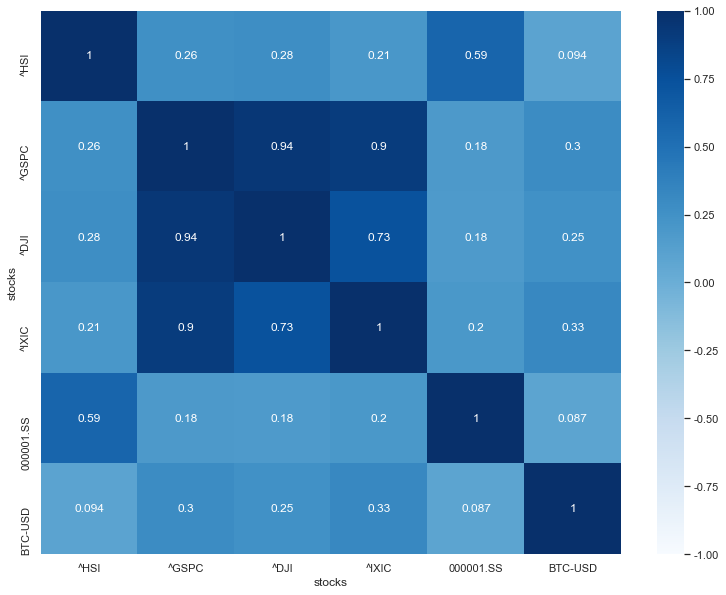

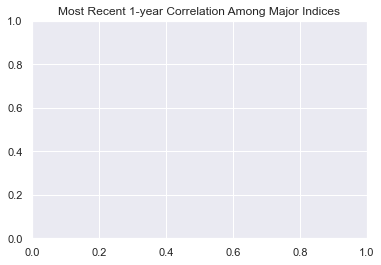

In [22]:
plot_heatmap_corrleation(merged_all[merged_all.index>"2020-04-01"],sheng_CN+sheng_US+['000001.SS']+['BTC-USD'])
plt.title("Most Recent 1-year Correlation Among Major Indices");

In [20]:
0.0167*13000

217.1

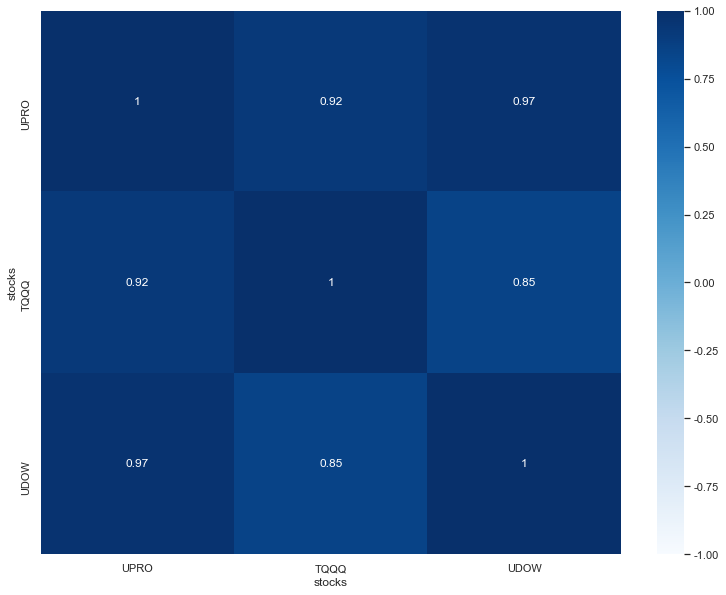

In [21]:
plot_heatmap_corrleation(merged_all,['UPRO','TQQQ','UDOW'])

In [94]:
691.8/739.78-1

-0.06485711968423047

In [47]:
26.39/25.67

1.0280483054148812

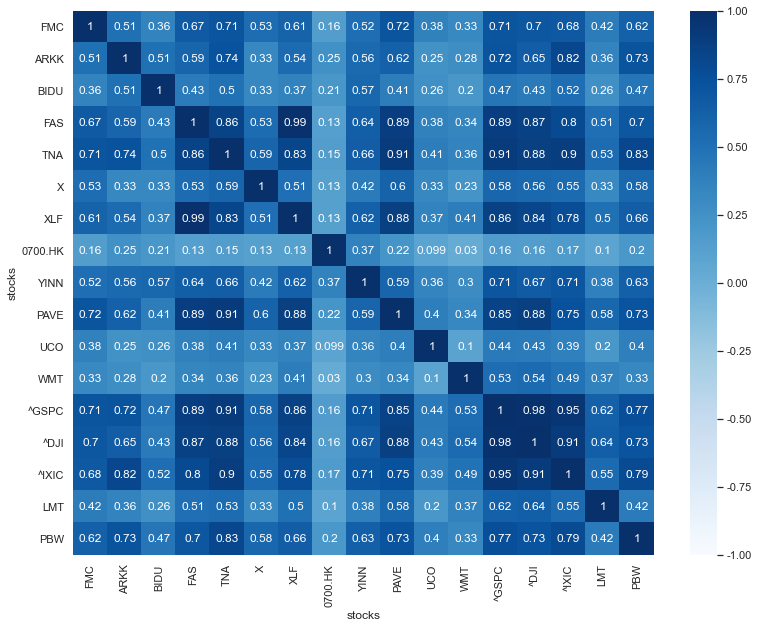

In [66]:
plot_heatmap_corrleation(merged_all,daily_portfolio+['UCO','WMT','^GSPC','^DJI','^IXIC','LMT','PBW'])

In [ ]:
plot_heatmap_corrleation(merged_all,sheng_CN)

In [21]:
# corr_matrix = merged_all[['CMG','TQQQ','UUP','XLF','XLI']+['DRN','USD','UYM','SOXL','UDOW','EUO']].corr()
corr_matrix = merged_all[['UUP','EUO']].corr()
each_corr_mean = corr_matrix[corr_matrix!=1].mean()

In [22]:
each_corr_mean.sort_values()

UUP    0.939739
EUO    0.939739
dtype: float64

In [41]:
selected_new_tickers = [
#                         'UPS',#处于上升通道下沿，上穿5日均线，MACD值反转上升。到168左右止盈（0323）
#                         'PAYC', #走出一个三角楔形形态，形成支撑点:376.89	，上穿5日均线，到396.278左右止盈，MACD翻绿即止损（0323）
#                        'CSCO',#限价单49.74买入入场，形成支撑点49.74，并上穿5日均线，趋势向上；止损点48.15，止盈52.3(0323)
#                        'QS'#形成支撑点:59.99，并在5、10、20日均线之上，止损62.6(0323)
#                         "GOOGL",
                        "UDOW",
                        "EUO"
                       ]

In [51]:
final_target_portfolio_tickers = current_portfolio_tickers+selected_new_tickers

In [24]:
main_etf

['SOXL',
 'TNA',
 'YINN',
 'PBW',
 'TQQQ',
 'UPRO',
 'FAS',
 'UDOW',
 'PAVE',
 'ARKG',
 'ARKK',
 'SCO',
 'NUGT',
 'UCO',
 'UVXY']

In [58]:
daily_portfolio = ['FMC','ARKK','BIDU','FAS','TNA','X','XLF','0700.HK','YINN','PAVE']

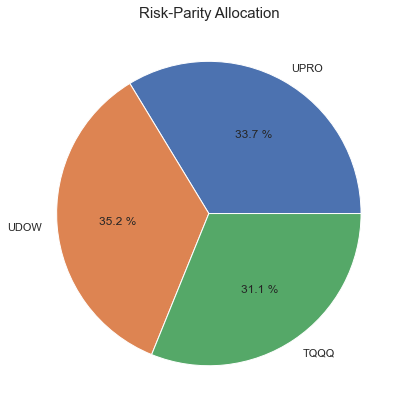

In [22]:
stocks_path = "C:/Users/Administrator/CE_github_2/data_pipeline/Data/"
date_col = 'Date'
code_col = 'Ticker'
price_col = 'Adj Close'
ticker_type = 'string'
asset_name = "code"

risk_parity = RiskParity(stocks_path,
                          ['UPRO','UDOW','TQQQ'],
                          date_col,
                          code_col,
                          price_col,
                          ticker_type,
                          asset_name,
                          True)

In [26]:
df_weights = risk_parity.df_wts.sort_values("weight", ascending=False)

In [27]:
df_weights

,code,weight
8,PAVE,0.145104
9,ARKG,0.116702
10,ARKK,0.112404
3,PBW,0.109561
12,NUGT,0.093667
13,UCO,0.071866
2,YINN,0.059509
7,UDOW,0.054272
5,UPRO,0.053914
6,FAS,0.051442


In [110]:
largest_pos_wts = 0.1
smallest_pos = 0.05234
benchmark_ratio = largest_pos_wts/df_weights['weight'].values[0]
benchmark_ratio_ = 
df_weights['target_wts'] = df_weights['weight']*benchmark_ratio

In [111]:
def read_data_from_folders(ticker_list, csv_folder):
    # csv_folder = "C:/Users/Administrator/CE_github_2/data_pipeline/Data/"
    load_count = 1
    last_price_list = []
    last_date_list = []
    len_tickers = len(ticker_list)
    df = pd.DataFrame()
    for ticker in ticker_list:
        print(ticker)
        try:
            data = pd.read_csv(csv_folder+ticker+".csv")
            last_close_price = data['Adj Close'].values[-1]
            last_date = data['Date'].values[-1]
            last_price_list.append(last_close_price)
            last_date_list.append(last_date)
            print ("Data Loaded from DB: No.{} / {}: {}, date:{}".format(load_count, len_tickers, ticker, last_date))
        except Exception as e:
            print(ticker, "Error:", e)
        load_count +=1
    df['adj close'] = last_price_list
    df['code'] = ticker_list
    df['date'] = last_date_list
    return df

In [112]:
df_portfolio_close = read_data_from_folders(final_target_portfolio_tickers, us_db_path)

ARKG
Data Loaded from DB: No.1 / 8: ARKG, date:2021-03-23
BABA
Data Loaded from DB: No.2 / 8: BABA, date:2021-03-23
TSLA
Data Loaded from DB: No.3 / 8: TSLA, date:2021-03-23
PAYC
Data Loaded from DB: No.4 / 8: PAYC, date:2021-03-23
UPS
Data Loaded from DB: No.5 / 8: UPS, date:2021-03-23
GOOGL
Data Loaded from DB: No.6 / 8: GOOGL, date:2021-03-23
CMG
Data Loaded from DB: No.7 / 8: CMG, date:2021-03-23
UUP
Data Loaded from DB: No.8 / 8: UUP, date:2021-03-23


In [113]:
df_portfolio_close

,adj close,code,date
0,89.320000,ARKG,2021-03-23
1,237.669998,BABA,2021-03-23
2,662.159973,TSLA,2021-03-23
3,373.890015,PAYC,2021-03-23
4,159.860001,UPS,2021-03-23
5,2041.329956,GOOGL,2021-03-23
6,1451.290039,CMG,2021-03-23
7,24.879999,UUP,2021-03-23


In [114]:
df_weights

,code,weight,target_wts
7,UUP,0.521881,0.100000
4,UPS,0.101474,0.019444
5,GOOGL,0.077684,0.014885
6,CMG,0.072494,0.013891
1,BABA,0.069954,0.013404
0,ARKG,0.062384,0.011954
3,PAYC,0.048487,0.009291
2,TSLA,0.045642,0.008746


In [115]:
df_weights_close_price = df_weights.merge(df_portfolio_close, on = "code")

In [116]:
df_weights_close_price['portfolio_asset'] = 100000

In [117]:
df_weights_close_price

,code,weight,target_wts,adj close,date,portfolio_asset
0,UUP,0.521881,0.100000,24.879999,2021-03-23,100000
1,UPS,0.101474,0.019444,159.860001,2021-03-23,100000
2,GOOGL,0.077684,0.014885,2041.329956,2021-03-23,100000
3,CMG,0.072494,0.013891,1451.290039,2021-03-23,100000
4,BABA,0.069954,0.013404,237.669998,2021-03-23,100000
5,ARKG,0.062384,0.011954,89.320000,2021-03-23,100000
6,PAYC,0.048487,0.009291,373.890015,2021-03-23,100000
7,TSLA,0.045642,0.008746,662.159973,2021-03-23,100000


In [51]:
df_weights_close_price["shares"] = round(df_weights_close_price["portfolio_asset"]*df_weights_close_price["target_wts"]/df_weights_close_price['adj close'],0)                 
df_weights_close_price['target_dollar_position'] = df_weights_close_price['adj close']*df_weights_close_price['shares']

In [52]:
df_weights_close_price[df_weights_close_price["code"].isin(selected_new_tickers)]

,code,weight,target_wts,adj close,date,portfolio_asset,shares,target_dollar_position
2,GOOGL,0.132765,0.109849,2041.329956,2021-03-23,100000,5.0,10206.649780
3,CMG,0.125944,0.104205,1451.290039,2021-03-23,100000,7.0,10159.030273


In [53]:
df_weights_close_price[df_weights_close_price["code"].isin(selected_new_tickers)][['date','code','target_wts']]

,date,code,target_wts
2,2021-03-23,GOOGL,0.109849
3,2021-03-23,CMG,0.104205


In [ ]:
selected_new_tickers = ['UPS',#处于上升通道下沿，上穿5日均线，MACD值反转上升。止损点设为到168左右止盈（0323）
                        'PAYC', #走出一个三角楔形形态，形成支撑点:376.89	，上穿5日均线，到396.278左右止盈，MACD翻绿即止损（0323）
                       'CSCO',#限价单49.74买入入场，向上突破近期高点，并形成49.74附近的支撑点，并上穿5日均线，趋势向上；止损点48.15，止盈52.3
                       'QS'#形成支撑点:59.99，并在5、10、20日均线之上，止损62.6
                       ]

In [ ]:
# current portfolio & calculate correlations inside the portfolio

current_portfolio_tickers = ["ARKG",# 跌穿120日均线则止损
                             "BABA",#若当日收盘MACD死叉，则第二日平仓
                             "BNTX",# 跌下5日均线则平仓，或者涨上111则止盈
                             "LOW",#涨上183.5止盈；或者跌下5日均线;
                             "TSLA",# 跌穿120日均线则止损
                             "VZ"# 若当日收盘于5日均线以下，第二天平仓
                            ]

您订阅的【华彩智盈】操作计划更新了：
代码：CMG
时间：2021/3/24
价格：
方向：买入
仓位：10.4%
理由：上穿5日均线，并且短期趋势向上
平仓计划：若当日收盘在5日均线之下，第二日平仓

您订阅的【华彩智盈】操作计划更新了：
代码：UPS
时间：2021/3/23
价格：
方向：买入
仓位：9.6%
理由：处于上升通道下沿，上穿5日均线，MACD值反转上升
平仓计划：止损点设为156

您订阅的【华彩智盈】操作计划更新了：
代码：PAYC
时间：2021/3/23
价格：
方向：买入
仓位：5.4%
理由：近期走出一个三角楔形形态，收盘价在支撑点376.89附近之上，并且上穿5日均线
平仓计划：MACD翻绿即止损平仓

您订阅的【华彩智盈】操作计划更新了：
代码：QS
时间：2021/3/23
价格：
方向：买入
仓位：2%
理由：最新收盘价在近期支撑点59.99附近之上，并收于5、10、20日均线之上，短期有向上趋势
平仓计划：止损点设为62.6

以上仅为嘉宾操作计划展示，不构成任何投资建议，交易有风险，据此操作风险自负！

In [ ]:
开盘后

UPS 止损点设为156
CSCO限价单49.74买入，11.2%

In [7]:
def linreg(x, y):

    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y, x).fit()
    a = model.params[0]
    b = model.params[1]
    x = x[:, 1]

# Return summary of the regression and plot results
    x2 = np.linspace(x.min(), x.max(), 100)
    y_hat = x2*b + a
    plt.scatter(x, y, alpha = 0.3) #Plot the raw data
    plt.plot(x2, y_hat, 'r', alpha = 0.9); #Add the regression line, colored in red
    plt.xlabel('x Value')
    plt.ylabel('y Value')
    return model.summary()

In [8]:
ks = pd.read_csv(us_db_path+"1024.HK.csv")
hsi = pd.read_csv(us_db_path+"^HSI.csv")

In [10]:
ks['pct_chg'] = ks['Adj Close'].pct_change()
hsi['pct_chg'] = hsi['Adj Close'].pct_change()

In [12]:
ks.dropna(inplace = True)
hsi.dropna(inplace = True)

In [15]:
ks_pct = ks[['Date','pct_chg']]
hsi_pct = hsi[['Date','pct_chg']]

In [19]:
ks_pct.columns = ['date','1024.HK']
hsi_pct.columns = ['date','HSI']

In [22]:
merged = hsi_pct.merge(ks_pct, on = 'date')

In [26]:
merged.to_csv("HSI_1024HK_pct_chg.csv")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     27.81
Date:                Thu, 15 Apr 2021   Prob (F-statistic):           4.63e-06
Time:                        18:27:10   Log-Likelihood:                 75.886
No. Observations:                  43   AIC:                            -147.8
Df Residuals:                      41   BIC:                            -144.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0014      0.006     -0.217      0.830      -0.014       0.012
x1             2.3656      0.449      5.274      0.000       1.460       3.271
==============================================================================
Omnibus:                       12.534   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.861
Skew:                           0.954   Prob(JB):                     0.000593
Kurtosis:                       5.158   Cond. No.                         69.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

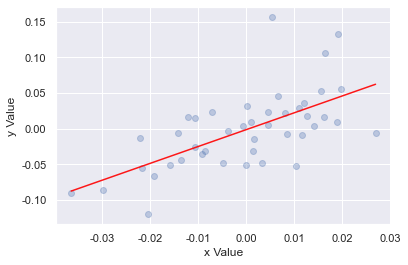

In [25]:
linreg(merged['HSI'].values, merged['1024.HK'].values)

In [27]:
from scipy import stats

data_list = [0.5202,
0.3931,
0.3599,
0.3492,
0.3420,
0.2291,
0.1315,
0.0907,
0.0532,
0.0454,
0.0287,
0.0128,
0.0039,
-0.0340,
-0.0716,
-0.1361,
-0.1821,
-0.1997,
-0.2450,
-0.4827]

data_series = pd.Series(data_list)

In [ ]:
# 计算平均值和标准差
mu = data_series.mean()
sigma = data_series.std()

In [64]:
mu

0.06042499999999999

In [65]:
sigma

0.2508212760114261

In [42]:
# 检验是否是正态分布，结果是的

"""
kstest方法：KS检验，参数分别是：待检验的数据，检验方法（这里设置成norm正态分布），均值与标准差
结果返回两个值：statistic → D值，pvalue → P值
p值大于0.05，为正态分布
H0:样本符合  
H1:样本不符合 
如何p>0.05接受H0 ,反之 
"""

stats.kstest(data_series, 'norm', (mu, sigma))

KstestResult(statistic=0.11919886343629293, pvalue=0.9071970906678607)

In [81]:
# 再用正态分布模型分别计算四个值发生的概率

prob_5202 = stats.norm.cdf(0.5202, mu, sigma)
prob_2601 = stats.norm.cdf(0.2601, mu, sigma)
prob_0 = stats.norm.cdf(0, mu, sigma)
prob_2414 = stats.norm.cdf(-0.2414, mu, sigma)
prob_4827 = stats.norm.cdf(-0.4827, mu, sigma)

In [82]:
1-prob_5202

0.03339547517280861

In [83]:
prob_5202-prob_0

0.5617915427442657

In [86]:
prob_0-prob_4827

0.3896339318097076

In [85]:
prob_4827

0.015179050273218066